## 乱数生成の逆関数法について

逆関数法（Inverse Transform Sampling）は、任意の確率分布から乱数を生成する方法の一つです。特に、累積分布関数（CDF）が逆関数を持つ場合に有効です。ここでは、中学生にもわかるように逆関数法の基本的なアイデアを説明します。

### 逆関数法の基本的なアイデア

逆関数法は、次のような手順で行います。

1. **一様乱数を生成する**:
   - まず、0から1の間の一様乱数$U$を生成します。一様乱数とは、0から1の間でどの値も同じ確率で出現する乱数のことです。

2. **累積分布関数の逆関数を使う**:
   - 次に、生成した一様乱数$U$を累積分布関数（CDF）の逆関数に通します。これにより、求めたい分布に従う乱数$X$が得られます。

### 具体的な手順

具体的な手順を以下のように進めます。

1. **累積分布関数（CDF）を求める**:
   - 確率分布の累積分布関数$F(x)$を求めます。$F(x)$は、変数が$x$以下になる確率を示します。

2. **逆関数を求める**:
   - $F(x)$の逆関数$F^{-1}(u)$を求めます。ここで、$u$は0から1の間の値です。

3. **一様乱数を生成する**:
   - 0から1の間の一様乱数$U$を生成します。

4. **逆関数を使って乱数を変換する**:
   - 生成した一様乱数$U$を逆関数$F^{-1}(u)$に通して、新しい乱数$X$を得ます。$X = F^{-1}(U)$と表せます。

### 例

簡単な例として、指数分布から乱数を生成する方法を考えます。指数分布の累積分布関数は次のように表されます。

$$
F(x) = 1 - e^{-\lambda x}
$$

ここで、$\lambda$は分布のパラメータです。次に、この累積分布関数の逆関数を求めます。

$$
F(x) = u \quad \Rightarrow \quad 1 - e^{-\lambda x} = u \quad \Rightarrow \quad e^{-\lambda x} = 1 - u \quad \Rightarrow \quad x = -\frac{1}{\lambda} \ln(1 - u)
$$

これで、逆関数$F^{-1}(u) = -\frac{1}{\lambda} \ln(1 - u)$が求まりました。

### Pythonでの実装例

以下に、指数分布に従う乱数を生成するPythonコードの例を示します。

このコードは、指数分布に従う乱数を逆関数法を使って生成し、その結果をプロットします。生成された乱数が理論的な指数分布と一致していることが確認できます。

### まとめ

- **逆関数法**は、任意の確率分布から乱数を生成するための一般的な方法です。
- **基本的なアイデア**は、一様乱数を生成し、それを累積分布関数の逆関数に通すことです。
- **具体的な手順**として、累積分布関数とその逆関数を求め、一様乱数を使って目的の分布に従う乱数を生成します。
- **Pythonでの実装**も比較的簡単で、様々な分布に対して応用可能です。

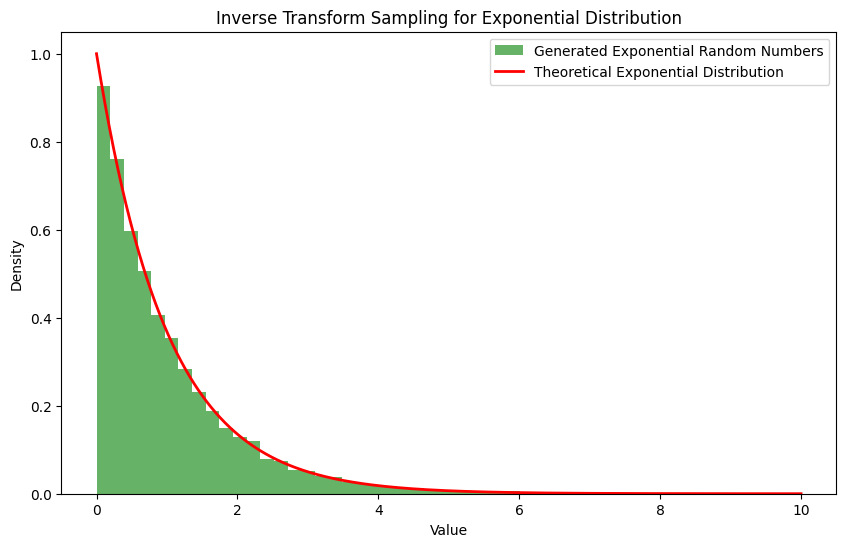

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
lambda_param = 1.0
num_samples = 10000

# 一様乱数の生成
uniform_random = np.random.uniform(0, 1, num_samples)

# 逆関数法による指数分布乱数の生成
exponential_random = -np.log(1 - uniform_random) / lambda_param

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.hist(exponential_random, bins=50, density=True, alpha=0.6, color='g', label='Generated Exponential Random Numbers')
x = np.linspace(0, 10, 1000)
plt.plot(x, lambda_param * np.exp(-lambda_param * x), 'r-', lw=2, label='Theoretical Exponential Distribution')
plt.title('Inverse Transform Sampling for Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## 採択・棄却法について

採択・棄却法（Acceptance-Rejection Method）は、任意の確率分布から乱数を生成するための方法の一つです。この方法は、逆関数法が適用できない場合や、逆関数を求めるのが難しい場合に特に有効です。以下では、中学生にもわかるように、採択・棄却法の基本的な考え方と手順について説明します。

### 基本的なアイデア

採択・棄却法は、簡単にサンプリングできる分布（提案分布）から候補点を生成し、その候補点をある確率で採択（受け入れる）する方法です。具体的には次のような手順で行います。

### 手順

1. **提案分布を選ぶ**:
   - 任意の確率分布$P(x)$から乱数を生成したい場合、まず、簡単にサンプリングできる提案分布$q(x)$を選びます。この提案分布は、$P(x)$を上から包むような形になっている必要があります。
   - また、提案分布に対するスケーリング定数$M$を見つけます。この$M$は、どんな$x$に対しても$P(x) \leq M \cdot q(x)$となるようにします。

2. **候補点の生成**:
   - 提案分布$q(x)$から候補点$x'$を生成します。

3. **一様乱数の生成**:
   - 0から1の間の一様乱数$u$を生成します。

4. **採択基準の評価**:
   - 生成した候補点$x'$を次の条件で評価します：
     $$
     u \leq \frac{P(x')}{M \cdot q(x')}
     $$
   - この条件を満たす場合、$x'$を採択し、次のサンプルとして使用します。
   - この条件を満たさない場合、$x'$を棄却し、再度候補点の生成からやり直します。

5. **繰り返し**:
   - 必要な数のサンプルが得られるまで、手順2から4を繰り返します。

### 具体例

例えば、標準正規分布$P(x)$から乱数を生成する場合を考えます。ここでは、提案分布として一様分布$q(x)$を使用します。

### Pythonでの実装例

以下に、標準正規分布から乱数を生成する採択・棄却法のPythonコードの例を示します。



このコードは、標準正規分布に従う乱数を採択・棄却法を使って生成し、その結果をプロットします。生成された乱数が理論的な標準正規分布と一致していることが確認できます。

### まとめ

- **採択・棄却法**は、任意の確率分布から乱数を生成するための一般的な方法です。
- **基本的なアイデア**は、簡単にサンプリングできる提案分布から候補点を生成し、その候補点を一定の確率で採択することです。
- **具体的な手順**として、提案分布から候補点を生成し、条件を満たす場合に採択し、満たさない場合には棄却します。
- **Pythonでの実装**も比較的簡単で、様々な分布に対して応用可能です。

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 標準正規分布の確率密度関数
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# 提案分布（一様分布）の確率密度関数
def proposal_distribution(x):
    return 1.0 / 10.0  # 一様分布の区間 [-5, 5] での確率密度

# スケーリング定数 M
M = np.sqrt(2 * np.pi) * np.exp(0.5 * 5**2)

# サンプリングの実行
num_samples = 1000
samples = []
while len(samples) < num_samples:
    x_prime = np.random.uniform(-5, 5)
    u = np.random.uniform(0, 1)
    
    if u <= target_distribution(x_prime) / (M * proposal_distribution(x_prime)):
        samples.append(x_prime)

# 結果のプロット
samples = np.array(samples)
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Generated Samples')
x = np.linspace(-5, 5, 1000)
plt.plot(x, target_distribution(x), 'r-', lw=2, label='Target Distribution')
plt.title('Acceptance-Rejection Sampling for Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

KeyboardInterrupt: 

## ジャックナイフ法について

ジャックナイフ法（Jackknife Resampling）は、統計推定のバイアスを評価したり、標準誤差を推定したりするためのリサンプリング法の一つです。この方法は、データセットの一部を繰り返し除外して統計量を計算し、その結果を元に推定を行います。

### ジャックナイフ法の基本的な考え方

ジャックナイフ法は、次の手順で行われます：

1. **データセットの一部を除外する**:
   - データセットから一つのデータ点を除外したサブセットを作成します。

2. **統計量を計算する**:
   - 各サブセットに対して統計量（例えば、平均、分散など）を計算します。

3. **推定値を計算する**:
   - 各サブセットの統計量を元に、全体の統計量の推定値を計算します。

4. **バイアスと標準誤差を評価する**:
   - 各サブセットの統計量を利用して、統計量のバイアスや標準誤差を評価します。

### 具体的な手順

具体的な手順を以下に示します。

1. **データセットの作成**:
   - 元のデータセットを$X = \{x_1, x_2, ..., x_n\}$とします。

2. **データ点を一つずつ除外**:
   - 各データ点$x_i$を除外したサブセット$X_{(i)} = X \setminus \{x_i\}$を作成します。

3. **統計量の計算**:
   - 各サブセット$X_{(i)}$に対して統計量$\theta_{(i)}$を計算します。例えば、平均値$\bar{X}_{(i)}$や分散$S_{(i)}^2$などです。

4. **推定値の計算**:
   - 元のデータセットに対する統計量の推定値$\hat{\theta}$を計算します。これには、各サブセットの統計量の平均を用います：
     $$
     \hat{\theta} = \frac{1}{n} \sum_{i=1}^{n} \theta_{(i)}
     $$

5. **バイアスと標準誤差の評価**:
   - バイアスを評価するために、以下のように計算します：
     $$
     \text{Bias}(\hat{\theta}) = (n - 1) \left( \hat{\theta} - \theta \right)
     $$
   - 標準誤差（ジャックナイフ標準誤差）を評価するために、以下のように計算します：
     $$
     \text{SE}_{\text{jack}} = \sqrt{\frac{n - 1}{n} \sum_{i=1}^{n} (\theta_{(i)} - \hat{\theta})^2}
     $$

### Pythonでの実装例

以下に、ジャックナイフ法を使って平均値の標準誤差を推定するPythonコードの例を示します。



このコードは、データセットの平均値の標準誤差をジャックナイフ法を用いて推定します。結果として、ジャックナイフ推定量とジャックナイフ標準誤差が出力されます。

### まとめ

- **ジャックナイフ法**は、データセットの一部を繰り返し除外して統計量を計算し、その結果を元に推定を行うリサンプリング法です。
- **基本的な手順**として、データセットの各データ点を除外したサブセットを作成し、それぞれのサブセットに対して統計量を計算します。
- **バイアスと標準誤差**の評価に利用され、統計推定の信頼性を高めるための有効な手法です。
- **Pythonでの実装**も比較的簡単で、様々な統計量の推定に応用可能です。

In [4]:
import numpy as np

# サンプルデータ
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n = len(data)

# 各サブセットの平均値を計算
jackknife_means = np.zeros(n)
for i in range(n):
    jackknife_sample = np.delete(data, i)
    jackknife_means[i] = np.mean(jackknife_sample)

# ジャックナイフ推定量
jackknife_estimate = np.mean(jackknife_means)

# ジャックナイフ標準誤差の計算
jackknife_se = np.sqrt((n - 1) / n * np.sum((jackknife_means - jackknife_estimate) ** 2))

print(f"ジャックナイフ推定量: {jackknife_estimate}")
print(f"ジャックナイフ標準誤差: {jackknife_se}")

ジャックナイフ推定量: 5.5
ジャックナイフ標準誤差: 0.9574271077563384


## ブートストラップ法について

ブートストラップ法（Bootstrap Method）は、データの再サンプリングに基づく統計推定手法の一つです。元のデータセットから多数のサブサンプルを作成し、それらに基づいて推定量の分布を評価することができます。この方法は、標本分布の推定や標準誤差の計算、信頼区間の構築などに広く使われます。

### 基本的な考え方

ブートストラップ法は、元のデータセットを再サンプリングすることで、推定量の分布を評価します。具体的には、次のような手順で行います：

1. **元のデータセット**: $X = \{x_1, x_2, ..., x_n\}$（元のデータセット、サイズ$n$）
2. **再サンプリング**: 元のデータセットから、復元抽出（同じデータ点を複数回選ぶことができる抽出）によって新しいサンプルを多数（$B$個）生成します。
3. **統計量の計算**: 各再サンプルに対して、関心のある統計量（平均、分散、回帰係数など）を計算します。
4. **分布の評価**: 再サンプルから得られた統計量の分布をもとに、推定量の標準誤差や信頼区間を評価します。

### ブートストラップ法の手順

1. **再サンプルの生成**:
   - 元のデータセット$X$から、サイズ$n$の再サンプル$X^*_b$（$b = 1, 2, ..., B$）を復元抽出で生成します。$B$は再サンプルの数です。

2. **統計量の計算**:
   - 各再サンプル$X^*_b$に対して、関心のある統計量$\hat{\theta}^*_b$を計算します。

3. **標準誤差の推定**:
   - 再サンプルから得られた統計量の標準誤差を計算します。
     $$
     \text{SE}_{\text{boot}} = \sqrt{\frac{1}{B-1} \sum_{b=1}^{B} (\hat{\theta}^*_b - \bar{\theta}^*)^2}
     $$
     ここで、$\bar{\theta}^*$は再サンプル統計量の平均です。

4. **信頼区間の構築**:
   - 再サンプル統計量の分布を用いて、信頼区間を構築します。例えば、分位数法（Percentile Method）を用いる場合、再サンプル統計量の下位2.5%点と上位97.5%点を信頼区間の下限と上限とします。

### Pythonでの実装例

以下に、ブートストラップ法を使って平均値の標準誤差と信頼区間を推定するPythonコードの例を示します。



このコードは、元のデータセットから多数の再サンプルを生成し、それぞれのサンプルに対して平均値を計算します。再サンプルから得られた平均値の分布を用いて、標準誤差と95%信頼区間を推定し、結果をプロットします。

### まとめ

- **ブートストラップ法**は、再サンプリングを通じて統計量の分布を評価し、標準誤差や信頼区間を推定する方法です。
- **手順**として、元のデータセットから復元抽出による再サンプルを生成し、各再サンプルに対して統計量を計算します。
- **Pythonでの実装**も比較的簡単で、様々な統計推定に応用可能です。
- **利用シーン**として、標本分布の推定、標準誤差の計算、信頼区間の構築などがあります。

ブートストラップ標準誤差: 0.8944866592632894
ブートストラップ信頼区間: [3.8 7.3]


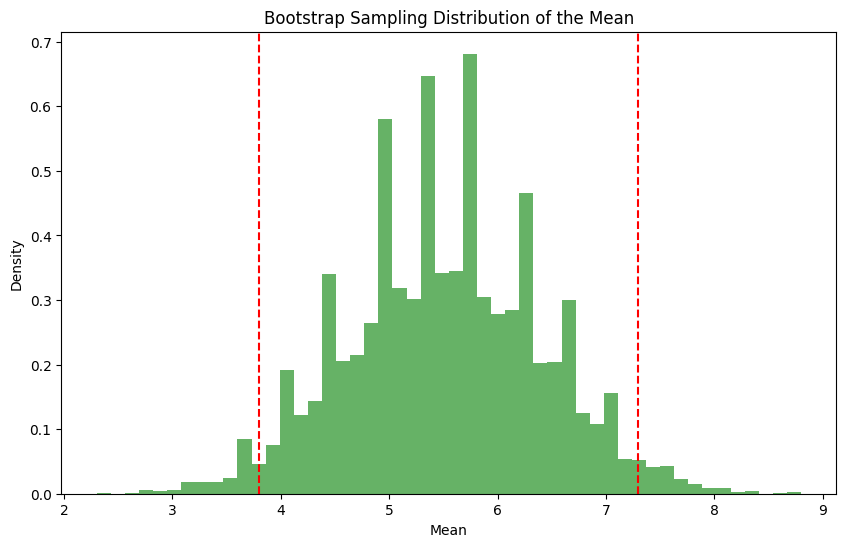

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 元のデータセット
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n = len(data)
B = 10000  # 再サンプルの数

# 再サンプルから平均値を計算
bootstrap_means = np.zeros(B)
for b in range(B):
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    bootstrap_means[b] = np.mean(bootstrap_sample)

# ブートストラップ標準誤差
bootstrap_se = np.std(bootstrap_means)

# ブートストラップ信頼区間（95%）
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"ブートストラップ標準誤差: {bootstrap_se}")
print(f"ブートストラップ信頼区間: {conf_interval}")

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=50, density=True, alpha=0.6, color='g')
plt.axvline(conf_interval[0], color='r', linestyle='--')
plt.axvline(conf_interval[1], color='r', linestyle='--')
plt.title('Bootstrap Sampling Distribution of the Mean')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.show()